# Pandas

### Cours

In [38]:
# import des librairies
import pandas as pd
import matplotlib.pyplot as plt

Création du dataframe à partir d'un fichier excel

In [4]:
pandas_df = pd.read_excel('./titanic3.xls')


Affichage des lignes et colonnes

In [8]:
print(pandas_df.shape)

(1309, 14)


Affichage des 5 premières lignes

In [9]:
print(pandas_df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

Affichage des colonnes

In [15]:
print(pandas_df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


Suppression de certaines colonnes

In [29]:
mon_pddf = pandas_df.drop(['sibsp', 'parch','ticket','fare','cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)
mon_pddf.head()

,pclass,survived,name,sex,age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


Méthode describe()

In [28]:
mon_pddf.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Soit on remplace les valeurs qui n'ont pas été indiquées dans le DF

In [22]:
mon_pddf.fillna(mon_pddf["age"].mean())

,pclass,survived,name,sex,age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000
...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000
1305,3,0,"Zabour, Miss. Thamine",female,29.881135
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000


Soit on ne prend que les lignes qui sont renseignées

In [27]:
new_df = mon_pddf.dropna(axis=0) #Axe 0 correspond aux lignes et axe 1 aux colonnes du DF
new_df.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Extraction directe des infos

<Axes: ylabel='Frequency'>

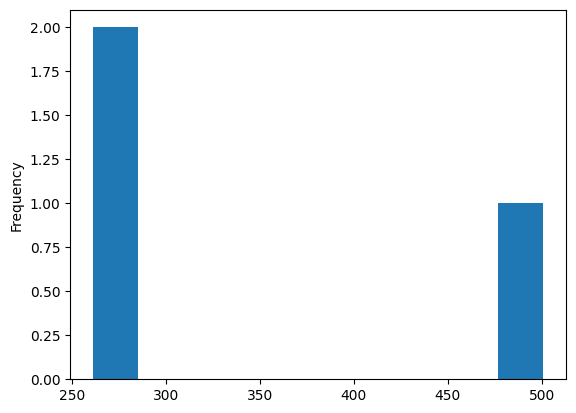

In [35]:
count_new_df = new_df['pclass'].value_counts()
count_new_df.plot.hist()

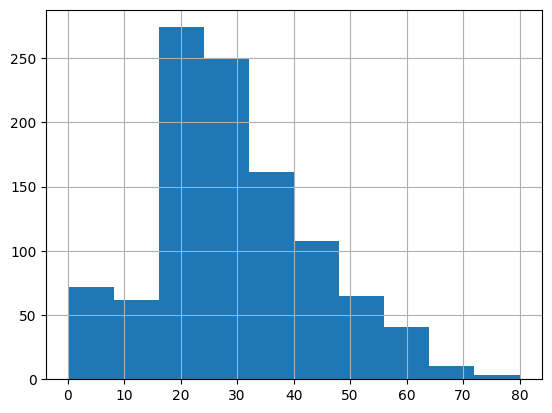

In [41]:
mon_pddf["age"].hist()
plt.show() #permet d'afficher le graphique en python, ici pas utile en Jupiter

Fonction de regroupement

In [57]:
mon_pddf.groupby(["sex"]).count()

,pclass,survived,name,age
sex,,,,
female,466,466,466,388
male,843,843,843,658


In [61]:
mon_pddf[["pclass","survived","age","sex"]].groupby('sex').mean()

,pclass,survived,age
sex,,,
female,2.154506,0.727468,28.687071
male,2.372479,0.190985,30.585233


In [63]:
mon_pddf["name"][50:69]

50    Cardeza, Mrs. James Warburton Martinez (Charlo...
51                             Carlsson, Mr. Frans Olof
52                              Carrau, Mr. Francisco M
53                               Carrau, Mr. Jose Pedro
54                  Carter, Master. William Thornton II
55                            Carter, Miss. Lucile Polk
56                           Carter, Mr. William Ernest
57            Carter, Mrs. William Ernest (Lucile Polk)
58                               Case, Mr. Howard Brown
59    Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...
60                        Cavendish, Mr. Tyrell William
61    Cavendish, Mrs. Tyrell William (Julia Florence...
62                          Chaffee, Mr. Herbert Fuller
63    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
64                        Chambers, Mr. Norman Campbell
65       Chambers, Mrs. Norman Campbell (Bertha Griggs)
66                          Chaudanson, Miss. Victorine
67                                 Cherry, Miss.

In [64]:
mon_pddf["age"] < 18

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool